## Dimensionality Reduction in IT Job Market Analysis: Applying PCA for High-Paid Roles in India

#### Objective:To understand and apply Principal Component Analysis (PCA) for reducing dimensionality in a dataset of high-paid IT jobs in India while retaining key information for analysis.

#### Prerequisites:

Basic knowledge of Python

Understanding of Principal Component Analysis (PCA)

Familiarity with Pandas, NumPy, and Scikit-Learn libraries

#### Dataset Description:
The dataset consists of information about high-paid IT jobs in India, with the following columns:

Position – Job roles in the IT industry.

Location – Work location (Remote/On-Site).

Gender – Male/Female.

Education – Degree details of professionals.

Experience (Years) – Number of years of experience.

Salary – Current salary of individuals.

##### Lab Steps:



#### Step 1: Import Necessary Libraries


In [1]:
import numpy as np
import pandas as pd

#### Step 2: Load and Explore the Dataset

In [11]:
# Download dataset from: https://www.kaggle.com/datasets/ashutosh598/position-salary-dataset/data


#  Step 2:  Loading the data 
df= pd.read_csv("Dimension position_salary.csv",encoding= 'latin1')
print(df.head())
print(df.info())


# Display first few rows
print("First few rows of the dataset:")
print(df.head())

#  Check data types and missing values
print("\nDataset Info:")
print(df.info())

#  Handle missing values using forward fill (ffill)
df[["Position", "Gender", "Education"]] = df[["Position", "Gender", "Education"]].ffill()

# Check missing values
print("\nMissing Values Count:")
print(df.isnull().sum())


                            Position   Location  Gender    Education  \
0  QNXT Configuration QA/Testing SME  Ghaziabad  Female  B.Tech/B.E.   
1           Provider Data Management  New Delhi  Female  B.Tech/B.E.   
2          Accessibility Engineer QA      Noida  Female          BCA   
3           Senior Software Engineer  Jalandhar    Male          NaN   
4         Java Developer/Spring Boot     Meerut    Male          B.A   

   Experience (Years)   Salary  
0                  11  2014510  
1                  24  1624349  
2                  25  1926223  
3                  27  2403560  
4                  11  1128404  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3467 entries, 0 to 3466
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Position            3448 non-null   object
 1   Location            3467 non-null   object
 2   Gender              3443 non-null   object
 3   Education         

#### Step 3: Data Preprocessing

Convert categorical variables into numerical form.

Handle missing values if any.

Standardize numerical features.

In [3]:

# Encoding Categorical Variables
df = pd.get_dummies(df, columns=['Position', 'Location', 'Gender', 'Education'], drop_first=True)

# Display the first few rows of the dataset after encoding
print("Dataset after encoding categorical variables:")
print(df.head())


Dataset after encoding categorical variables:
   Experience (Years)   Salary  Position_.Net /JavaScript  \
0                  11  2014510                      False   
1                  24  1624349                      False   
2                  25  1926223                      False   
3                  27  2403560                      False   
4                  11  1128404                      False   

   Position_.Net Architect  Position_.Net Developer  \
0                    False                    False   
1                    False                    False   
2                    False                    False   
3                    False                    False   
4                    False                    False   

   Position_.Net Developer    Position_.Net Lead/Angular, JavaScript  \
0                      False                                   False   
1                      False                                   False   
2                      False            

In [4]:
# Handling Missing Values
# Forward fill missing values to ensure completeness in categorical features
df.fillna(df.mean(), inplace=True)

In [5]:
#  Extracting Numerical Features
feature = ['Experience (Years)', 'Salary']
x = df[feature]

# Display the extracted numerical features
print("\nSelected Numerical Features:")
print(x)

# Display summary statistics of numerical features
print("\nSummary Statistics:")
print(x.describe())  # Showing min & max values as well
print("\nMinimum Salary:", 5.026890e+05)
print("Maximum Salary:", 2.499925e+06)


Selected Numerical Features:
      Experience (Years)   Salary
0                     11  2014510
1                     24  1624349
2                     25  1926223
3                     27  2403560
4                     11  1128404
...                  ...      ...
3462                  21   816277
3463                  20  1786298
3464                  28  1050400
3465                  25   764525
3466                  24  2252207

[3467 rows x 2 columns]

Summary Statistics:
       Experience (Years)        Salary
count         3467.000000  3.467000e+03
mean            16.639746  1.487459e+06
std              6.935259  5.776934e+05
min              5.000000  5.026890e+05
25%             11.000000  9.818155e+05
50%             17.000000  1.475343e+06
75%             23.000000  1.985568e+06
max             28.000000  2.499925e+06

Minimum Salary: 502689.0
Maximum Salary: 2499925.0


In [6]:
# Standardizing the Data
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
scaler = x_scaler.fit_transform(x)

# Display the standardized values
print("\nStandardized Data:")
print(scaler)


Standardized Data:
[[-0.81331635  0.91246923]
 [ 1.06143337  0.23699453]
 [ 1.20564489  0.75962044]
 ...
 [ 1.63827944 -0.75666713]
 [ 1.20564489 -1.25159443]
 [ 1.06143337  1.32398732]]


#### Step 4: Apply PCA

In [7]:
# Applying PCA (Principal Component Analysis)
from sklearn.decomposition import PCA

# Reduce to 2 principal components
pca = PCA(n_components=2)  
x_pca = pca.fit_transform(scaler)

In [8]:
# Explained variance ratio
print("Variation ratio:", pca.explained_variance_ratio_)

# Sum of explained variance ratio
total_variance_explained = sum(pca.explained_variance_ratio_)
print("\nTotal variance explained by the two principal components:", total_variance_explained)

Variation ratio: [0.51666731 0.48333269]

Total variance explained by the two principal components: 1.0


#### Step 5: Visualizing PCA Components

In [9]:
# Step 5: Visualizing PCA Components

# Extracting individual principal components
PCA1 = x_pca[:, 0]  # First principal component
PCA2 = x_pca[:, 1]  # Second principal component

# Display extracted components
print("\nPrincipal Component 1:")
print(PCA1)

print("\nPrincipal Component 2:")
print(PCA2)

print("\nPCA Transformed Data:")
print(x_pca)


Principal Component 1:
[ 0.07011167  0.91812718  1.38965245 ...  0.62339405 -0.03249123
  1.68674715]

Principal Component 2:
[ 1.22031469 -0.5829663  -0.31538691 ... -1.69348296 -1.73753058
  0.18565368]

PCA Transformed Data:
[[ 0.07011167  1.22031469]
 [ 0.91812718 -0.5829663 ]
 [ 1.38965245 -0.31538691]
 ...
 [ 0.62339405 -1.69348296]
 [-0.03249123 -1.73753058]
 [ 1.68674715  0.18565368]]


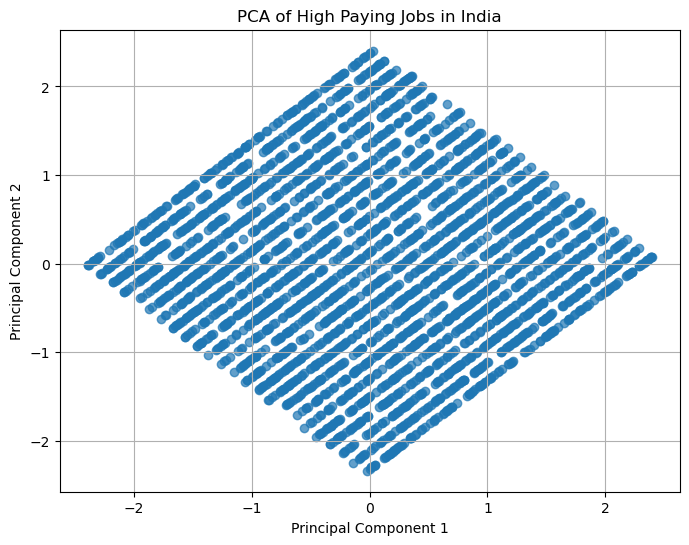

In [10]:
# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(PCA1, PCA2, alpha=0.7)  # Adding transparency for clarity
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of High Paying Jobs in India")
plt.grid(True)  # Adding grid for better visualization
plt.show()

#### Step 6: Interpretation and Conclusion

Observe how PCA helps in reducing dimensionality while retaining most of the information.

Analyze the variance explained by each component.

Discuss how PCA can assist in identifying patterns among high-paid IT jobs in India.

End of Lab Activity